In [1]:
from collect_data import *

In [2]:
os.listdir(meg_path)

['index.html?zip=',
 'README.txt',
 'participants.tsv',
 'participants.json',
 'dataset_description.json',
 'sub-11',
 'sub-10',
 'sub-09',
 'sub-08',
 'sub-07',
 'sub-06',
 'sub-05',
 'sub-04',
 'sub-03',
 'sub-02',
 'sub-01',
 'stimuli',
 'meg.gz',
 'collect_data']

In [3]:
stimuli_path = meg_path + '/stimuli/audio'
wav_files_duration = {}

for filename in os.listdir(stimuli_path):
    if filename.endswith('.wav'): 
        file_path = os.path.join(stimuli_path, filename)
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        wav_files_duration[filename.rstrip('.wav')] = duration
print('WAVE FILES DURATION: ',wav_files_duration)
print('WAVE FILES WITH\ NUMBERS: ',task)



WAVE FILES DURATION:  {'lw1': 318.1481632653061, 'lw1_3': 53.072426303854876, 'lw1_2': 93.7512925170068, 'lw1_1': 75.44276643990929, 'lw1_0': 95.88167800453515, 'easy_money_7': 129.30312925170068, 'easy_money_6': 123.42730158730159, 'easy_money_4': 163.68920634920636, 'easy_money_5': 142.36866213151927, 'easy_money_3': 141.97519274376418, 'easy_money_0': 143.12875283446712, 'easy_money_2': 180.43360544217688, 'easy_money_1': 104.10834467120182, 'cable_spool_fort_4': 123.26390022675737, 'cable_spool_fort_5': 54.69605442176871, 'cable_spool_fort_3': 105.82820861678005, 'cable_spool_fort_2': 137.65614512471655, 'cable_spool_fort_1': 134.8726984126984, 'cable_spool_fort_0': 100.59777777777778, 'the_black_willow_9': 188.23668934240362, 'the_black_willow_8': 142.4142403628118, 'the_black_willow_7': 172.399410430839, 'the_black_willow_6': 128.21628117913832, 'the_black_willow_5': 81.94331065759637, 'the_black_willow_4': 110.45659863945578, 'the_black_willow_2': 125.23859410430839, 'the_black_

In [4]:
wav_list_without_numb = list(task.keys())
raw = get_bids_raw(meg_path, patient[0], session[0], '0')
print('CHECK_RAW', raw)

Extracting SQD Parameters from /data01/data/MEG/sub-01/ses-0/meg/sub-01_ses-0_task-0_meg.con...
Creating Raw.info structure...
Setting channel info structure...
Creating Info structure...
Ready.
Reading events from /data01/data/MEG/sub-01/ses-0/meg/sub-01_ses-0_task-0_events.tsv.
Reading channel info from /data01/data/MEG/sub-01/ses-0/meg/sub-01_ses-0_task-0_channels.tsv.
The stimulus channel "STI 014" is present in the raw data, but not included in channels.tsv. Removing the channel.
Reading 0 ... 395999  =      0.000 ...   395.999 secs...


/home/matteoc/spect-to-meg/code/collect_data.py:46: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6601 samples (6.601 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
CHECK_RAW <RawKIT | sub-01_ses-0_task-0_meg.con, 208 x 396000 (396.0 s), ~628.6 MB, data loaded>


In [9]:
get_epochs = get_epochs(raw, 0.0, float(lw1[0]))
epoch_spectr = get_meg_from_raw_epochs(get_epochs)
# print(epoch_spectr.shape)
meg_spectr = get_meg_spectrogram(epoch_spectr)
meg_spectr_ranged = get_meg_spectrogram_ranged(epoch_spectr, 0, freq_cut)
print('MEG_SPECTR_SHAPE: ', meg_spectr.shape)
print('MEG_SPECTR_RANGED_SHAPE: ', meg_spectr_ranged.shape)


Adding metadata with 18 columns
180 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 180 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
torch.Size([180, 208, 3201])
MEG_SPECTR_SHAPE:  torch.Size([180, 208, 257, 26])
MEG_SPECTR_RANGED_SHAPE:  torch.Size([180, 208, 16, 26])


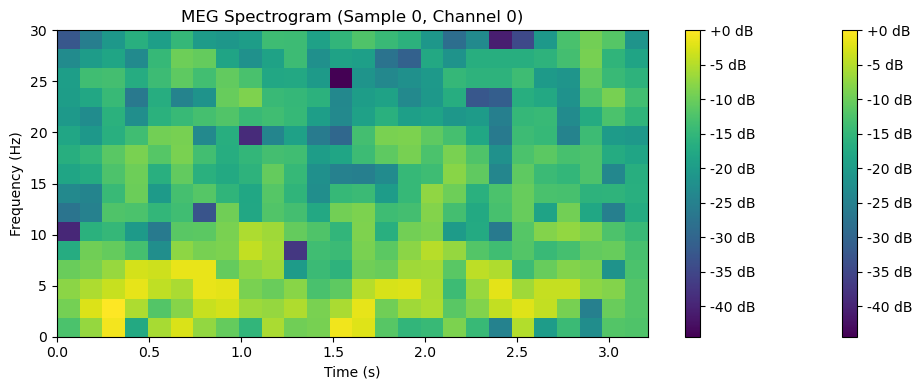

In [6]:
plot_spectrogram(meg_spectr_ranged, sampling_meg, 0, 0)

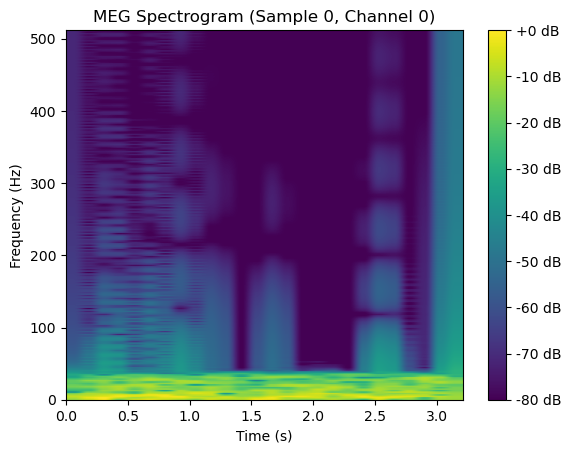

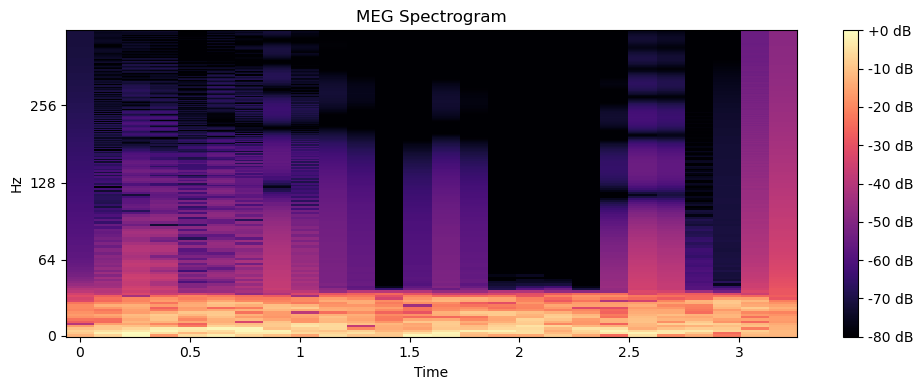

In [8]:
plot_spectrogram(meg_spectr, sampling_meg, 0, 0)

In [9]:
audio_path = stimuli_path + '/' + wav_list_without_numb[0] + '_0' + '.wav'
print('AUDIO_PATH: ',audio_path)
audio, sr = librosa.load(audio_path, sr=sampling_audio)
tot_length_audio = audio.shape[0] / sr
print('AUDIO_LENGTH_SAMPLES: ',audio.shape)
print('AUDIO_LENGTH_SECONDS: ',tot_length_audio)

AUDIO_PATH:  /data01/data/MEG/stimuli/audio/lw1_0.wav
AUDIO_LENGTH_SAMPLES:  (1534107,)
AUDIO_LENGTH_SECONDS:  95.8816875


In [10]:
audio_spectr = get_audio_spectrogram(audio_path, get_epochs)
print('AUDIO_SPECTR_SHAPE: ', audio_spectr.shape)

/home/matteoc/spect-to-meg/collect_data.py:135: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max)


AUDIO_SPECTR_SHAPE:  torch.Size([180, 257, 376])


/home/matteoc/spect-to-meg/collect_data.py:141: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /croot/pytorch_1686931851744/work/torch/csrc/utils/tensor_new.cpp:245.)
  audio_tensor = torch.tensor(data_audio_chunks)


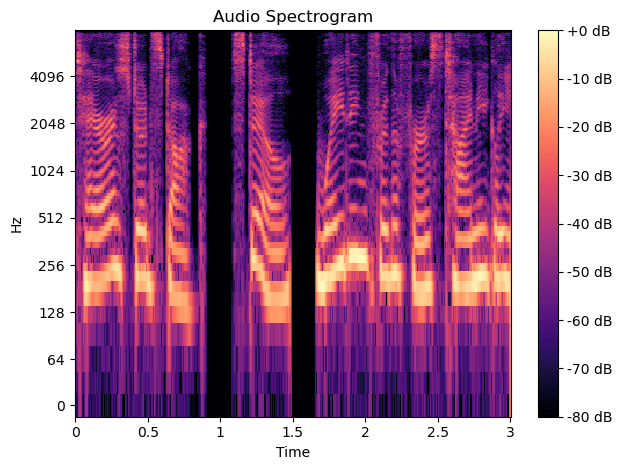

In [11]:
plot_spectrogram(audio_spectr, sampling_audio, 0, 0)

Save Data

In [5]:
audio_name = wav_list_without_numb[3]
subject = patient[0]
print('PATIENT: ', subject)
print('AUDIO_NAME: ', audio_name)

for i in range(len(session)):
    print("SESSION: ", session[i])
    story_uid = int(task[audio_name])
    print("STORY_UID_OR_TASK: ", story_uid)
    raw = get_bids_raw(meg_path, subject, session[i], str(story_uid))
    for z in range(len(the_black_willow)):
        print("SOUND_ID: ", float(the_black_willow[z]))
        epochs_data = get_epochs(raw, float(story_uid), float(the_black_willow[z]))
        epoch_spectr = get_meg_from_raw_epochs(epochs_data)
        meg_spectr_ranged = get_meg_spectrogram_ranged(epoch_spectr, 0, freq_cut)
        print('MEG_SPECTR_RANGED_SHAPE: ', meg_spectr_ranged.shape)
        save_data(meg_spectr_ranged, 'megsp', subject, str(i), str(story_uid), audio_name, str(z))
        if (i == 0 and subject == '01'):
            audio_path = stimuli_path + '/' + audio_name + '_' + str(z) + '.wav'
            audio_spectr = get_audio_spectrogram(audio_path, epochs_data)
            print('AUDIO_SPECTR_SHAPE: ', audio_spectr.shape)
            save_data(audio_spectr, 'audio', 'audio', '_', str(story_uid), audio_name, str(z))
            
                

PATIENT:  01
AUDIO_NAME:  the_black_willow
SESSION:  0
STORY_UID_OR_TASK:  3
Extracting SQD Parameters from /data01/data/MEG/sub-01/ses-0/meg/sub-01_ses-0_task-3_meg.con...
Creating Raw.info structure...
Setting channel info structure...
Creating Info structure...
Ready.
Reading events from /data01/data/MEG/sub-01/ses-0/meg/sub-01_ses-0_task-3_events.tsv.
Reading channel info from /data01/data/MEG/sub-01/ses-0/meg/sub-01_ses-0_task-3_channels.tsv.
The stimulus channel "STI 014" is present in the raw data, but not included in channels.tsv. Removing the channel.
Reading 0 ... 1868999  =      0.000 ...  1868.999 secs...


/home/matteoc/spect-to-meg/code/collect_data.py:46: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6601 samples (6.601 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
SOUND_ID:  0.0
Adding metadata with 18 columns
358 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 358 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
MEG_SPECTR_RANGED_SHAPE:  torch.Size([358, 208, 16, 26])


/home/matteoc/spect-to-meg/code/collect_data.py:136: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max)
/home/matteoc/spect-to-meg/code/collect_data.py:142: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /croot/pytorch_1686931851744/work/torch/csrc/utils/tensor_new.cpp:245.)
  audio_tensor = torch.tensor(data_audio_chunks)


AUDIO_SPECTR_SHAPE:  torch.Size([358, 257, 376])
SOUND_ID:  1.0
Adding metadata with 18 columns
262 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 262 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
MEG_SPECTR_RANGED_SHAPE:  torch.Size([262, 208, 16, 26])


/home/matteoc/spect-to-meg/code/collect_data.py:136: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max)


AUDIO_SPECTR_SHAPE:  torch.Size([262, 257, 376])
SOUND_ID:  2.0
Adding metadata with 18 columns
286 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 286 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
MEG_SPECTR_RANGED_SHAPE:  torch.Size([286, 208, 16, 26])


/home/matteoc/spect-to-meg/code/collect_data.py:136: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max)


AUDIO_SPECTR_SHAPE:  torch.Size([286, 257, 376])
SOUND_ID:  3.0
Adding metadata with 18 columns
306 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 306 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
MEG_SPECTR_RANGED_SHAPE:  torch.Size([306, 208, 16, 26])


/home/matteoc/spect-to-meg/code/collect_data.py:136: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max)


AUDIO_SPECTR_SHAPE:  torch.Size([306, 257, 376])
SOUND_ID:  4.0
Adding metadata with 18 columns
247 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 247 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
MEG_SPECTR_RANGED_SHAPE:  torch.Size([247, 208, 16, 26])


/home/matteoc/spect-to-meg/code/collect_data.py:136: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max)


AUDIO_SPECTR_SHAPE:  torch.Size([247, 257, 376])
SOUND_ID:  5.0
Adding metadata with 18 columns
185 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 185 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
MEG_SPECTR_RANGED_SHAPE:  torch.Size([185, 208, 16, 26])


/home/matteoc/spect-to-meg/code/collect_data.py:136: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max)


AUDIO_SPECTR_SHAPE:  torch.Size([185, 257, 376])
SOUND_ID:  6.0
Adding metadata with 18 columns
256 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 256 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
MEG_SPECTR_RANGED_SHAPE:  torch.Size([256, 208, 16, 26])


/home/matteoc/spect-to-meg/code/collect_data.py:136: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max)


AUDIO_SPECTR_SHAPE:  torch.Size([256, 257, 376])
SOUND_ID:  7.0
Adding metadata with 18 columns
384 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 384 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
MEG_SPECTR_RANGED_SHAPE:  torch.Size([384, 208, 16, 26])


/home/matteoc/spect-to-meg/code/collect_data.py:136: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max)


AUDIO_SPECTR_SHAPE:  torch.Size([384, 257, 376])
SOUND_ID:  8.0
Adding metadata with 18 columns
309 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 309 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
MEG_SPECTR_RANGED_SHAPE:  torch.Size([309, 208, 16, 26])


/home/matteoc/spect-to-meg/code/collect_data.py:136: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max)


AUDIO_SPECTR_SHAPE:  torch.Size([309, 257, 376])
SOUND_ID:  9.0
Adding metadata with 18 columns
411 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 411 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
MEG_SPECTR_RANGED_SHAPE:  torch.Size([411, 208, 16, 26])


/home/matteoc/spect-to-meg/code/collect_data.py:136: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max)


AUDIO_SPECTR_SHAPE:  torch.Size([411, 257, 376])
SOUND_ID:  10.0
Adding metadata with 18 columns
411 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 411 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
MEG_SPECTR_RANGED_SHAPE:  torch.Size([411, 208, 16, 26])


/home/matteoc/spect-to-meg/code/collect_data.py:136: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max)


AUDIO_SPECTR_SHAPE:  torch.Size([411, 257, 376])
SOUND_ID:  11.0
Adding metadata with 18 columns
338 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 338 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
MEG_SPECTR_RANGED_SHAPE:  torch.Size([338, 208, 16, 26])


/home/matteoc/spect-to-meg/code/collect_data.py:136: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_db = librosa.amplitude_to_db(librosa.stft(y, n_fft=n_fft, hop_length=hop_length), ref=np.max)


AUDIO_SPECTR_SHAPE:  torch.Size([338, 257, 376])
SESSION:  1
STORY_UID_OR_TASK:  3
Extracting SQD Parameters from /data01/data/MEG/sub-01/ses-1/meg/sub-01_ses-1_task-3_meg.con...
Creating Raw.info structure...
Setting channel info structure...
Creating Info structure...
Ready.
Reading events from /data01/data/MEG/sub-01/ses-1/meg/sub-01_ses-1_task-3_events.tsv.
Reading channel info from /data01/data/MEG/sub-01/ses-1/meg/sub-01_ses-1_task-3_channels.tsv.
The stimulus channel "STI 014" is present in the raw data, but not included in channels.tsv. Removing the channel.
Reading 0 ... 1771999  =      0.000 ...  1771.999 secs...


/home/matteoc/spect-to-meg/code/collect_data.py:46: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6601 samples (6.601 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
SOUND_ID:  0.0
Adding metadata with 18 columns
358 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 358 events and 3201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
MEG_SPECTR_RANGED_SHAPE:  torch.Size([358, 208, 16, 26])
SOUND_ID:  1.0
Ad